# PREDICTION nyc

I thank the 3 people who inspired me on this work:
trainer  Jeremy  Anschenbrenner on udemy "machine learning and python,  competitors KarelVerhoeven and  BAdpocyk.

# Data loading

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

## data exploration 

In [3]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


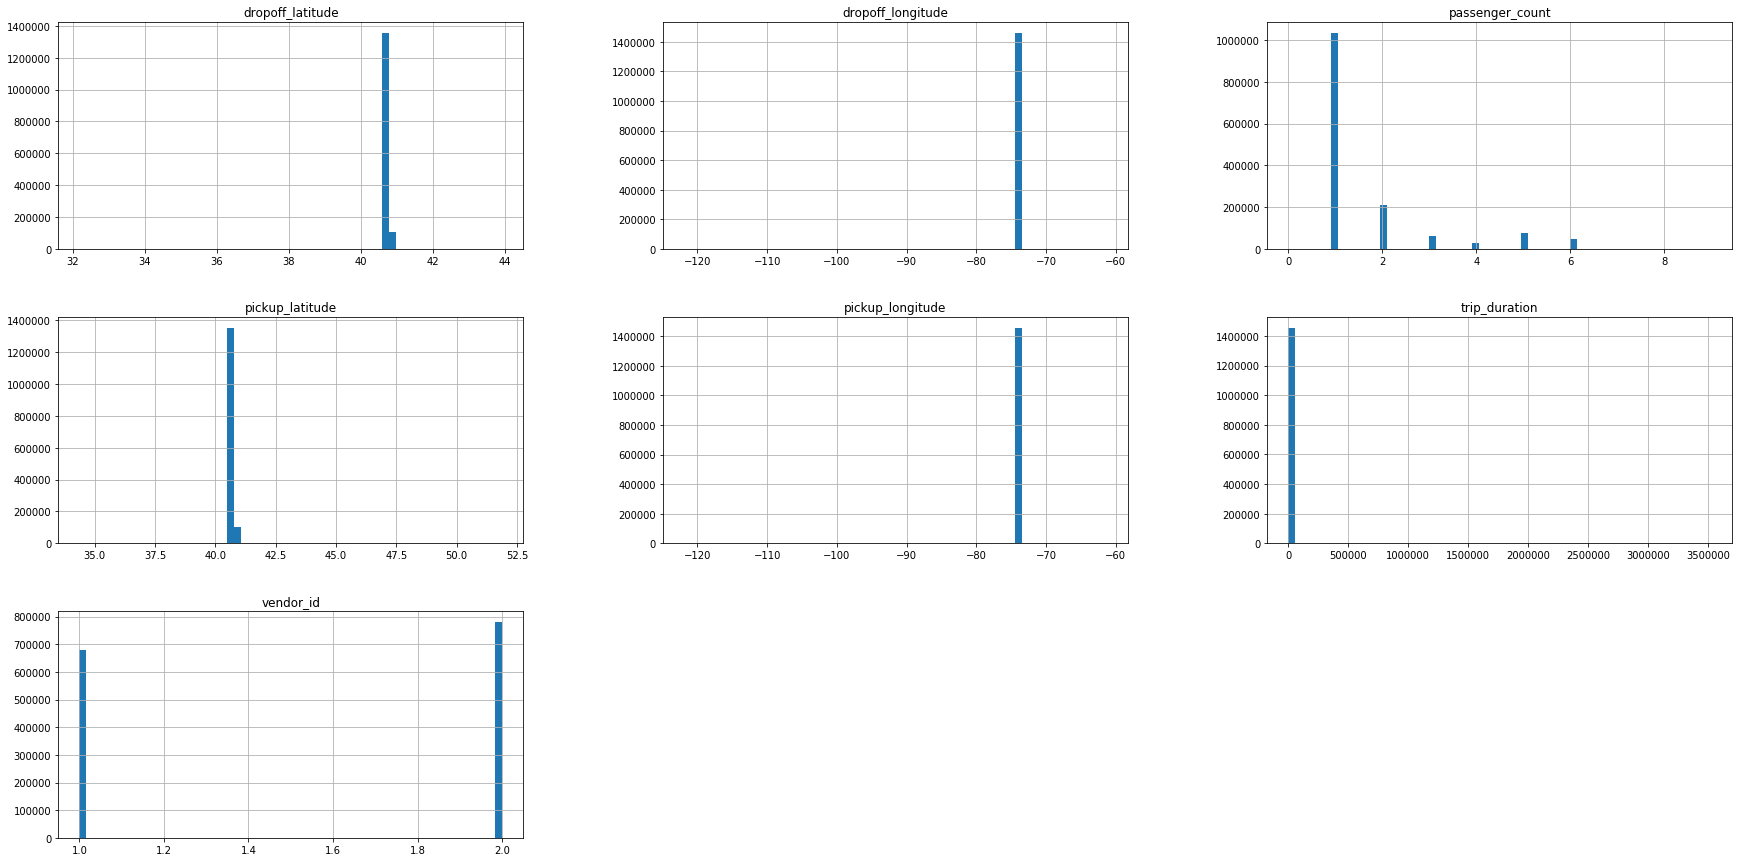

In [5]:
df_train.hist(bins=60, figsize=(30,15))
plt.show()

#### zoom sur trip_duration

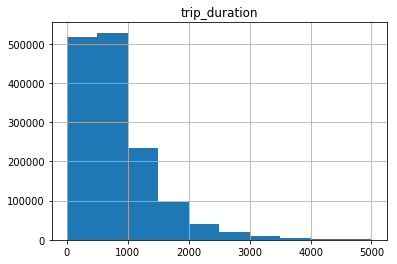

In [6]:
df_train.loc[df_train['trip_duration'] < 5000, 'trip_duration'].hist();

plt.title('trip_duration')
plt.show()

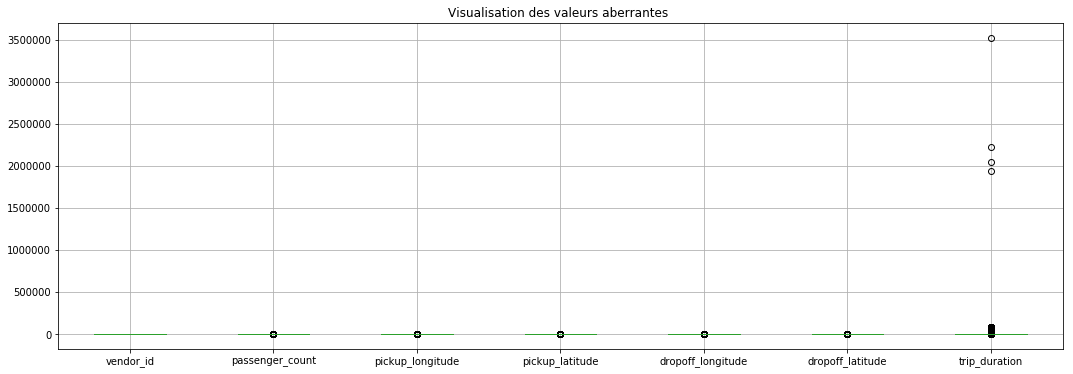

In [7]:
plt.subplots(figsize=(18,6))
plt.title("Visualisation des valeurs aberrantes ")
df_train.boxplot();

In [8]:
df_train.isna().sum()



id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

 ### Features engineering

In [9]:

sh =df_train.shape[0]

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


 ### Filter

Extraction des trajets moins de 1om 

In [10]:
 
#print('il ya ', df_train[df_train['distances']<=0.01].shape[0], 'voyage moins de 1min')
#df_train = df_train[df_train['distances']>0.01]
#print('il ya ', df_train[df_train['distances']<=0.01].shape[0], 'voyage moins de 1min')

supprimer les voyages ayant duré moins d'une minute apres filtre 

In [11]:

print('il ya', df_train[df_train['trip_duration']<=1*60].shape[0], "voyage moins de 1min")
df_train = df_train[df_train['trip_duration']>1*60]
print('il ya', df_train[df_train['trip_duration']<=1*60].shape[0], 'voyage moins de 1min')

il ya 8777 voyage moins de 1min
il ya 0 voyage moins de 1min


supprimer le trajet avec une vitesse moyenne supérieure à 200 km / h (les distances sont en lignes droites, je pourrais probablement choisir un nombre plus petit)

In [12]:

#df_train[df_train['distances']/(df_train['trip_duration'])>=200/3600].shape[0]
#df_train = df_train[df_train['distances']/(df_train['trip_duration'])<200/3600]
#print('There is', df_train[df_train['distances']/(df_train['trip_duration'])>=200/3600].shape[0], 'se déplace à une vitesse moyenne supérieure à 200 km / h après filtrage')

suppression des trajets de plus de 3 heures

In [13]:

#print('', df_train[df_train['trip_duration']>=3*3600].shape[0], )
#df_train = df_train[df_train['trip_duration']<3*3600]
#print('', df_train[df_train['trip_duration']>=3*3600].shape[0]

supprimer le trajet avec une vitesse moyenne inférieure à 1 km / h

In [14]:

#print('il ya ', df_train[df_train['distances']/(df_train['trip_duration'])<=1/3600].shape[0]
#df_train = df_train[df_train['distances']/(df_train['trip_duration'])>1/3600]
#print('il ya ', df_train[df_train['distances']/(df_train['trip_duration'])<=1/3600].shape[0]

In [15]:
print('nous avons filtrer','{:.3}'.format((sh-df_train.shape[0])/sh*100) , '' )

nous avons filtrer 0.602 


"Plusieurs filtres peuvent être appliqués aux données d’entraînement. Comme supprimer les petites distances, les trajets rapides.Ces filtres ne semblaient pas aider. Il s'avère que les modèles fonctionnent peuvent fonctionner cela"

Source : udemy  kirill EREMENKO : course : Machine learning 

###  Features Selection et  Extraction

In [16]:
def Ftr_sel(df_in):
    CATEG = [ 'store_and_fwd_flag' ]
    NUME = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'zone', 'distances', 'pickup_Month', 'pickup_Hour', 'pickup_Weekend', 'passenger_count', 'vendor_id' ]
    categ = CATEG
    nume = NUME

    X=df_in.loc[:, categ + nume]

    for cat in categ:
        X[cat] = X[cat].astype('category').cat.codes

    return X

In [17]:
X_train = Ftr_sel(df_train)
target = 'trip_duration'
y_train = df_train.loc[:, target]
print(X_train.shape, y_train.shape)
y_train = np.log1p( y_train )
X_train.head()

(1449867, 12) (1449867,)


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,store_and_fwd_flag,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,zone,distances,pickup_Month,pickup_Hour,pickup_Weekend,passenger_count,vendor_id
0,0,40.767937,-73.982155,40.765602,-73.964630,NaN,NaN,NaN,NaN,NaN,1,2
1,0,40.738564,-73.980415,40.731152,-73.999481,NaN,NaN,NaN,NaN,NaN,1,1
2,0,40.763939,-73.979027,40.710087,-74.005333,NaN,NaN,NaN,NaN,NaN,1,2
3,0,40.719971,-74.010040,40.706718,-74.012268,NaN,NaN,NaN,NaN,NaN,1,2
4,0,40.793209,-73.973053,40.782520,-73.972923,NaN,NaN,NaN,NaN,NaN,1,2


  ### apprentissage 

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_log_error as MSLE
import xgboost

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Model Selection

In [19]:
X_train_sample, X_validation, y_train_sample, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42 )
print(X_train_sample.shape, y_train_sample.shape , X_validation.shape, y_validation.shape)
X_train_sample.head(5)

(1159893, 12) (1159893,) (289974, 12) (289974,)


,store_and_fwd_flag,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,zone,distances,pickup_Month,pickup_Hour,pickup_Weekend,passenger_count,vendor_id
807135,0,40.750336,-73.994675,40.705654,-73.920372,NaN,NaN,NaN,NaN,NaN,1,2
210014,0,40.718792,-74.010040,40.714611,-73.961449,NaN,NaN,NaN,NaN,NaN,1,2
1452443,0,40.769650,-73.981766,40.771481,-73.923187,NaN,NaN,NaN,NaN,NaN,1,1
133097,0,40.762230,-73.968567,40.784454,-73.981094,NaN,NaN,NaN,NaN,NaN,1,1
831560,0,40.704777,-74.015701,40.707832,-74.001450,NaN,NaN,NaN,NaN,NaN,5,2


## Random Forest

Hyperparametres
`n_estimators` or the number of trees in the forest. The bigger, the better, but the longer it takes. 10 is 30 sec, 100 is <10 min. 
`min_samples_leaf` or the number of samples in the final leaf. Best at 1, to get all the small variations. `max_features` or the number of features used for each trees. Best at 0.4 (40% of total, or 4 features used)



In [20]:
#min_samples_leaf = {  1: 0.14335025261894946,  2: 0.13981831370645642,   3: 0.13852060557356807,  4: 0.1374604137021863, 5: 0.13701190316428685, 6: 0.13719592541154788,  7: 0.13647552678899308,   8: 0.13668619429239404,  9: 0.13678934918189598, 10: 0.13720206662667936, 15: 0.1378838545097919,   20: 0.13858468007164235,  25: 0.1397767624826059, 30: 0.14040835836429333, 35: 0.14162848146663448,  40: 0.14219905657487034,  45: 0.14265841548835242, 50: 0.14374664124817566, 100: 0.14924626267746,   150: 0.15302159678464494, 200: 0.15600849362124466, 250: 0.1578977545855252,  300: 0.16053779676581148, }
#plt.plot(min_samples_leaf.keys(), min_samples_leaf.values());
#plt.title('min_samples_leaf optimization');
#plt.legend(" with hyperparameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features=0.4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=9, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1, oob_score=False, random_state=50, verbose=0, warm_start=False)") #plt.legend(" with features: pickup_latitude	pickup_longitude	dropoff_latitude	dropoff_longitude	zone	distances	pickup_Month	pickup_Hour	pickup_Weekend	passenger_count ")
#plt.xlabel('min_samples_leaf');
#plt.ylabel('MSLE score');
#min(min_samples_leaf, key=min_samples_leaf.get)

AVEC XGBOOST

### XGBoost

In [21]:

#params = { 'booster':'gbtree', 'verbosity':1, 'max_depth':15, 'subsample': 1, 'lamda':0, 'max_delta_step':3, 'objective':'reg:linear', 'learning_rate':0.08, 'colsample_bytree':0.9, 'colsample_bylevel':0.9}
#data_train = xgboost.DMatrix(X_train_sample,y_train_sample)
#model = xgboost.train(params, data_train, num_boost_round=200)

In [22]:
#real = list(np.expm1(y_validation))
#predicted = list(np.expm1(model.predict(xgboost.DMatrix(X_validation))))
#print('\nMean Square Log Error score:', MSLE(real, predicted))

Nous esperons un meilleur score avec XGBOOST : "c'est l'objectif de la compétition"

### Model training

In [37]:
time
rf = RandomForestRegressor( n_estimators=100, min_samples_leaf=1, max_depth=None, max_features=.4, oob_score=False, bootstrap=True, n_jobs=-1 )

modelparams = { 'booster':'gbtree', 'verbosity':1, 'max_depth':15, 'subsample': 1, 'lamda':0, 'max_delta_step':3, 'objective':'reg:linear', 'learning_rate':0.08, 'colsample_bytree':0.9, 'colsample_bylevel':0.9}
data_train = xgboost.DMatrix(X_train,y_train)
#xg = xgboost.train(params, data_train, num_boost_round=200)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


CPU times: user 899 ms, sys: 419 ms, total: 1.32 s
Wall time: 1.08 s


In [24]:

#rf.fit( X_train, y_train );
#rf.feature_importances_

In [25]:
#rf1_scores=-cross_val_score( rf, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error' )
#rf1_scores, np.mean(rf1_scores)

## #Predictions

In [26]:
X_test = Ftr_sel(df_test)
X_test.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,store_and_fwd_flag,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,zone,distances,pickup_Month,pickup_Hour,pickup_Weekend,passenger_count,vendor_id
0,0,40.732029,-73.988129,40.756680,-73.990173,NaN,NaN,NaN,NaN,NaN,1,1
1,0,40.679993,-73.964203,40.655403,-73.959808,NaN,NaN,NaN,NaN,NaN,1,1
2,0,40.737583,-73.997437,40.729523,-73.986160,NaN,NaN,NaN,NaN,NaN,1,1
3,0,40.771900,-73.956070,40.730469,-73.986427,NaN,NaN,NaN,NaN,NaN,1,2
4,0,40.761475,-73.970215,40.755890,-73.961510,NaN,NaN,NaN,NaN,NaN,1,1


In [33]:
#y_test_predict = model.predict(X_test)
#y_test_predict = np.expm1(y_test_predict)
#y_test_predict[:5]

In [34]:
y_test_predict = np.expm1(xg.predict(xgboost.DMatrix(X_test)))
y_test_predict[:5]

array([832.6915 , 480.19513, 469.17896, 950.64624, 366.5814 ],
      dtype=float32)

### Submission

In [40]:
submission = pd.DataFrame(df_test.loc[:, 'id'])
submission['trip_duration']=y_test_predict
print(submission.shape)
submission.head(7)

(625134, 2)


,id,trip_duration
0,id3004672,832.691528
1,id3505355,480.195129
2,id1217141,469.178955
3,id2150126,950.646240
4,id1598245,366.581390
5,id0668992,1129.125732
6,id1765014,1125.910400


In [39]:
submission.to_csv("submit_file.csv", index=False)